# Final Project - Tutorial

In [1]:
#Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits

Import and print a standard image from fits library, you read the pixel array (.data) from image .fits and store it in img_data
then you unpack the data using matplot plt


ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


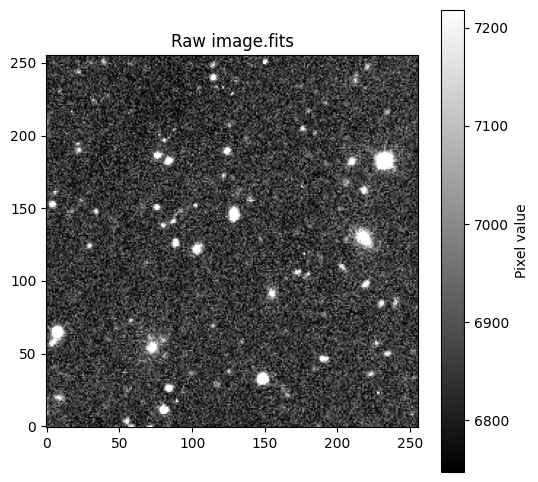

In [2]:
#Put the image into a 2d array to read 
#Print the image 
with fits.open("image.fits") as hdul:
    img_data = hdul[0].data.astype(np.float32)

plt.figure(figsize=(6, 6))
plt.imshow(img_data, cmap="gray", origin="lower", 
           vmin=np.percentile(img_data, 5),
           vmax=np.percentile(img_data, 99))
plt.colorbar(label="Pixel value")
plt.title("Raw image.fits")
plt.savefig("RawImage.png")
plt.show()

Measure a spacially varing backround in the image, to then eventually subtract it to be able to detect sources

In [3]:
bkg = sep.Background(img_data)
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


Now that you have the backround data, you then turn the data into a 2-d array to then be able to show it

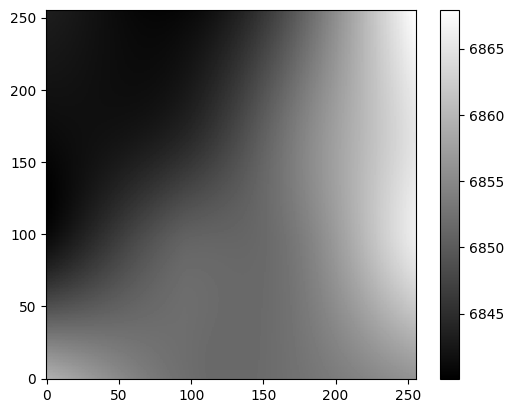

In [4]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig("Image_backround.png")
plt.colorbar();

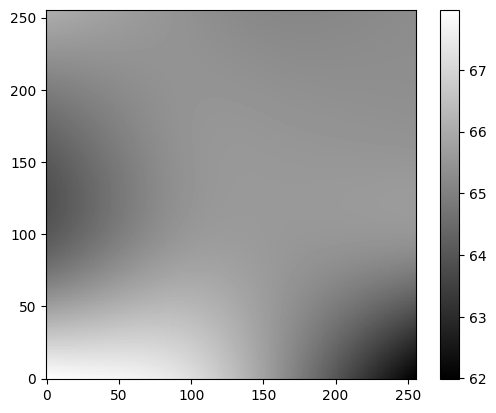

In [5]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig("Image_Backround_noise.png")
plt.colorbar();

Subtracting backround from picture to be able to then detect objects in it. 

In [6]:
data_sub = img_data - bkg

Now that backround is subtracted, you can then run image detection, we make the error values be the backround

In [7]:
objects = sep.extract(data_sub, 1.5, err = bkg.globalrms)
#How many objects detected 
len(objects)

69

After knowing where the objects are, you can draw the image with and eclips overlaying the corrdinates of where objects were detected

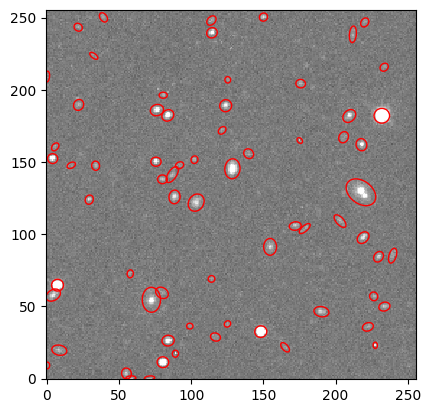

In [8]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    plt.savefig("Image_with_objects_circled.png")

Knowing the location of the objects you can perform aperture photometry(where the brightness in the picture lies) on the objects with a 3 pixel radius 

In [9]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
